In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

In [2]:
train=pd.read_csv("train.csv")

In [52]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,30.0000,C148,C


In [20]:
train.loc[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [90]:
train.shape

(891, 12)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.7+ KB


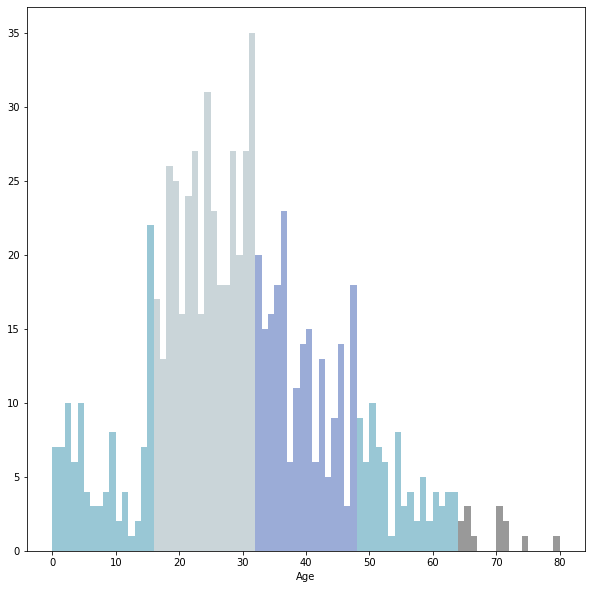

In [4]:
plt.figure(figsize=[10,10])
sns.distplot(train['Age'].dropna().values, bins=range(0,17), kde=False, color="#007598")
sns.distplot(train['Age'].dropna().values, bins=range(16, 33), kde=False, color="#7B97A0")
sns.distplot(train['Age'].dropna().values, bins=range(32, 49), kde=False, color="#06319B")
sns.distplot(train['Age'].dropna().values, bins=range(48,65), kde=False, color="#007598")
sns.distplot(train['Age'].dropna().values, bins=range(64,81), kde=False, color="#000000",
axlabel='Age')
plt.show()

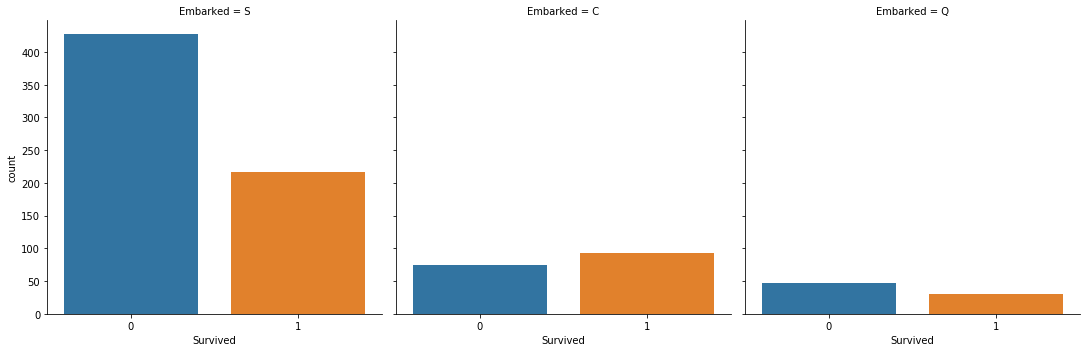

In [49]:

sns.factorplot('Survived',col='Embarked',col_wrap=3,data=train,kind='count')
plt.show()

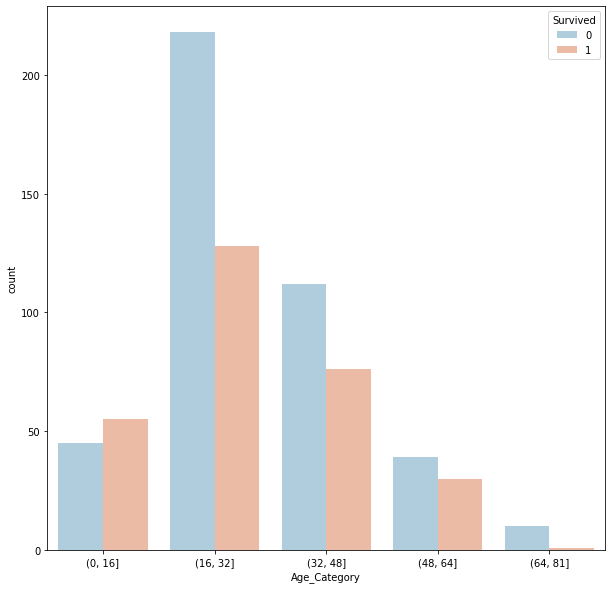

In [3]:
train['Age_Category'] = pd.cut(train['Age'],
bins=[0,16,32,48,64,81])
plt.subplots(figsize=(10,10))
sns.countplot('Age_Category',hue='Survived',data=train, palette='RdBu_r')
plt.show()

In [4]:
train['Age_Category2'] = pd.cut(train['Age'],
bins=[0,16,32,48,64,81],labels=[0,1,2,3,4])
train["Age"]=train['Age_Category2']
train.drop(columns=["Age_Category2","Age_Category"],inplace=True)


In [8]:
#computing death percentages according to age categories
print(train.loc[~train.Age.notnull(),"Survived"].value_counts().values[1]/train.loc[~train.Age.notnull(),"Survived"].value_counts().values.sum())
print(train.loc[train["Age"]==0,"Survived"].value_counts().values[1]/train.loc[train["Age"]==0,"Survived"].value_counts().values.sum())
print(train.loc[train["Age"]==1,"Survived"].value_counts().values[1]/train.loc[train["Age"]==1,"Survived"].value_counts().values.sum())
print(train.loc[train["Age"]==2,"Survived"].value_counts().values[1]/train.loc[train["Age"]==2,"Survived"].value_counts().values.sum())
print(train.loc[train["Age"]==3,"Survived"].value_counts().values[1]/train.loc[train["Age"]==3,"Survived"].value_counts().values.sum())
print(train.loc[train["Age"]==4,"Survived"].value_counts().values[1]/train.loc[train["Age"]==4,"Survived"].value_counts().values.sum())


0.3862815884476534
0.38273615635179153


IndexError: index 1 is out of bounds for axis 0 with size 0

In [5]:
train['Age'].fillna(1,inplace=True)

In [6]:
train['Age'].value_counts()

1    523
2    188
0    100
3     69
4     11
Name: Age, dtype: int64

In [7]:
train['Age']=train['Age'].astype(int)

In [24]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
corr_matrix=train.corr()
corr_matrix['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.043800
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [8]:
traincabin=train.copy(deep=True)

In [9]:
traincabin['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F2             3
              ..
B82 B84        1
B102           1
E49            1
C111           1
B19            1
Name: Cabin, Length: 147, dtype: int64

In [10]:
traincabin["Cabin"].fillna(0,inplace=True)
filt=traincabin['Cabin']==0
traincabin.loc[~filt,'Cabin']=1
traincabin['Cabin']=traincabin['Cabin'].astype(int)
traincabin["Cabin"].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [11]:
corr_mat=traincabin.corr()
corr_mat["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.043800
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Cabin          0.316912
Name: Survived, dtype: float64

In [12]:
filt=(traincabin["Cabin"]==1) & (traincabin["Survived"]==1)
traincabin.loc[filt].count()

PassengerId    136
Survived       136
Pclass         136
Name           136
Sex            136
Age            136
SibSp          136
Parch          136
Ticket         136
Fare           136
Cabin          136
Embarked       134
dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
sexencoded=ordinal_encoder.fit_transform(traincabin[["Sex"]])
traincabin["Sex"]=sexencoded
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [65]:
wanted_features=["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin"]
withoutrelatives=["Pclass","Sex","Age","Fare","Cabin"]

In [16]:
traincabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,2,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,1,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,1,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1.0,1,0,0,111369,30.0000,C148,C


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledtraincabin=scaler.fit_transform(traincabin[wanted_features])
scaledtraincabin[0]


array([ 0.82737724,  0.73769513, -0.35791375,  0.43279337, -0.47367361,
       -0.50244517, -0.54492498])

In [66]:
from sklearn.base import BaseEstimator,TransformerMixin
spsibling=6
parentchild=7
fare=9
class Attributesadder(BaseEstimator,TransformerMixin):
    def __init__(self,addattributes=True,remover=False):
        self.addattributes=addattributes
        self.remover=remover
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        value=X.values
        relativesdeleted=X.values
        if self.addattributes:
            fareperperson=value[:,5]/(1+value[:,3]+value[:,4])
            if self.remover:
                relativesdeleted=np.delete(value,[3,4],1)
            return np.c_[relativesdeleted,fareperperson]
        if self.remover:
            relativesdeleted=np.delete(value,[3,4],1)
            return relativesdeleted
            
        
            
            
        
        

In [67]:
attradder=Attributesadder(True,False)
train_fareperperson=attradder.transform(train[wanted_features])
relativesremoved=np.delete(scaledtraincabin,[3,4],1)
fareperperson_norela=np.delete(train_fareperperson,[3,4],1)

In [68]:
train_fareperperson[0]

array([3, 'male', 1, 1, 0, 7.25, nan, 3.625], dtype=object)

In [21]:
traincabin[wanted_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    float64
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
 6   Cabin   891 non-null    int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 45.4 KB


In [ ]:
import sklearn
print(sorted(sklearn.metrics.SCORERS.keys()))

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'C':[0.001,0.01,0.1,1,10,50,100],'kernel':['linear']},
    {'C':[0.001,0.01,0.1,1,10,50,100],'kernel':['polynomial'],'coef0':[0],'degree':[10,20,30,40,50,60,70,80,90,100]},
    {'C':[0.001,0.01,0.1,1,10,50,100],'kernel':['rbf'],'gamma':[1,0.1,0.01,0.001,0.0001]}

]
from sklearn.svm import SVC
svc=SVC()
grid_search=GridSearchCV(svc,param_grid,cv=3,scoring='f1')
grid_search.fit(train_fareperperson,traincabin["Survived"])

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100], 'coef0': [0],
                          'degree': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                          'kernel': ['polynomial']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             p

In [29]:
from sklearn.model_selection import GridSearchCV

params=[{'max_depth':np.arange(1,7,1).tolist(),'min_samples_split':np.arange(1,30,1).tolist(),'min_samples_leaf':np.arange(1,20,1).tolist()}]
from sklearn.tree import DecisionTreeClassifier
dtreeclf=DecisionTreeClassifier(random_state=42)
dtreegridsearch=GridSearchCV(dtreeclf,params,cv=3,scoring='f1')
dtreegridsearch.fit(train_fareperperson,traincabin["Survived"])

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6],
                     

In [31]:
joblib.dump(grid_search.best_estimator_,'svc')
joblib.dump(dtreegridsearch.best_estimator_,'DecisionTreeClassifier')

['DecisionTreeClassifier']

In [92]:
print(dtreegridsearch.best_params_)
dtreegridsearch.best_estimator_

{'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 2}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [114]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression

In [113]:
def model_applier(X):
    
    forestclassifier=RandomForestClassifier()
    forestpred=cross_val_predict(forestclassifier,X,traincabin["Survived"],cv=3)
    
    sgdclassifier=SGDClassifier()
    sgdpred=cross_val_predict(sgdclassifier,X,traincabin["Survived"],cv=3)
    
    logclassifier=LogisticRegression()
    logclassifierpred=cross_val_predict(logclassifier,X,traincabin["Survived"],cv=3)
    svc=joblib.load('svc')
    svcclassifier=cross_val_predict(svc,X,traincabin["Survived"],cv=3)
    DecisionTreeClassifier=joblib.load('DecisionTreeClassifier')
    dtreeclassifier=cross_val_predict(DecisionTreeClassifier,X,traincabin["Survived"],cv=3)
    return (forestpred,sgdpred,logclassifierpred,svcclassifier,dtreeclassifier)

In [106]:
def score_display(predictions):
    from sklearn.metrics import precision_score,recall_score
    print("Randomforest(precision):",precision_score(traincabin["Survived"],predictions[0]))
    print("SGDclassifier(precision):",precision_score(traincabin["Survived"],predictions[1]))
    print("LogisticRegression(precision):",precision_score(traincabin["Survived"],predictions[2]))
    print("SVC(precision):",precision_score(traincabin["Survived"],predictions[3]))
    print("DecisionTree(precision):",precision_score(traincabin["Survived"],predictions[4]))
    print("Randomforest(recall):",recall_score(traincabin["Survived"],predictions[0]))
    print("SGDclassifier(recall):",precision_score(traincabin["Survived"],predictions[1]))
    print("LogisticRegression(recall):",recall_score(traincabin["Survived"],predictions[2]))
    print("SVC(recall):",recall_score(traincabin["Survived"],predictions[3]))
    print("DecisionTree(recall):",recall_score(traincabin["Survived"],predictions[4]))


In [115]:
def f1_computer(predictions):
    from sklearn.metrics import f1_score
    forestclassifier=RandomForestClassifier()
    sgdclassifier=SGDClassifier()
    logclassifier=LogisticRegression()
    svc=joblib.load('svc')
    DecisionTreeClassifier=joblib.load('DecisionTreeClassifier')
    model_list=[forestclassifier,sgdclassifier,logclassifier,svc,DecisionTreeClassifier]
    for i,j in enumerate(model_list):
        print(j.__class__.__name__+":",f1_score(traincabin["Survived"],predictions[i]))

In [39]:
# wanted features + fareperperson
predictions=model_applier(train_fareperperson)
f1_computer(predictions)

Randomforest(f1): 0.7335329341317366
SGDclassifier(f1): 0.6634768740031898
LogisticRegression(f1): 0.7223880597014926
SVC(f1): 0.7741935483870968
DecisionTree(f1): 0.7563527653213753


In [38]:
# wantedfeatures
predictions=model_applier(scaledtraincabin)
f1_computer(predictions)

Randomforest(f1): 0.7221396731054978
SGDclassifier(f1): 0.6513056835637481
LogisticRegression(f1): 0.726998491704374
SVC(f1): 0.7546583850931677
DecisionTree(f1): 0.7280832095096583


In [41]:
# wanted features with sibsp and parch removed
predictions=model_applier(relativesremoved)
f1_computer(predictions)

Randomforest(f1): 0.7073170731707316
SGDclassifier(f1): 0.6587537091988129
LogisticRegression(f1): 0.721407624633431
SVC(f1): 0.6775244299674267
DecisionTree(f1): 0.7221396731054978


In [117]:
predictions=model_applier(fareperperson_norela)
f1_computer(predictions)

ValueError: could not convert string to float: 'male'

In [116]:
predictions=model_applier(finaltrain)
f1_computer(predictions)

RandomForestClassifier: 0.7267175572519083
SGDClassifier: 0.7011834319526628
LogisticRegression: 0.7220543806646524
SVC: 0.731782945736434
DecisionTreeClassifier: 0.7341389728096677


In [75]:
train["Cabin"].fillna(0,inplace=True)
filt=train['Cabin']==0
train.loc[~filt,'Cabin']=1
train['Cabin']=traincabin['Cabin'].astype(int)
train.loc[train['Embarked'].isna(),"Embarked"]='S'


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_pipe=Pipeline([('attrib_adder',Attributesadder(True,False)),
                  ('scaler',StandardScaler())])

In [100]:
wanted_features=["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
withoutrelatives=["Pclass","Sex","Age","Fare","Cabin"]
ordinal=["Sex"]
onehot=["Embarked"]
numeric=['Pclass','Age','SibSp','Parch','Fare','Cabin']
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
full_pipeline=ColumnTransformer([('num',Attributesadder(True,True),numeric),
                                ('ordinal',OrdinalEncoder(),ordinal),
                                 ('OneHot',OneHotEncoder(),onehot),
                            
               ])


In [101]:
finaltrain=full_pipeline.fit_transform(train[wanted_features])